<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Econo_Initial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_json("/content/drive/MyDrive/RDocs/trading-research-main/NSE-Data/Equity/Historical-ohlcv/ADANIENT/ADANIENT-2000-01-01-2023-05-31.json",typ='series')

In [3]:
dataset.head()

status                                               success
remarks                                                     
data       {'open': [6.63, 6.75, 6.75, 6.53, 6.5600000000...
dtype: object

In [4]:
df = pd.DataFrame(dataset['data'])

In [5]:
df.shape

(4903, 6)

In [6]:
df.head(5)

,open,high,low,close,volume,start_Time
0,6.63,6.72,6.50,6.59,43406.0,2003-09-05 00:00:00
1,6.75,6.81,6.57,6.62,37381.0,2003-09-08 00:00:00
2,6.75,6.87,6.47,6.59,41136.0,2003-09-09 00:00:00
3,6.53,6.68,6.50,6.58,36487.0,2003-09-10 00:00:00
4,6.56,6.75,6.47,6.53,38052.0,2003-09-11 00:00:00


#Spliting : X and y

In [15]:
X=df.iloc[:,0:3]
y=df.loc[:,'close']

#Scaling Dataset

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def StandardScaleData(data):
  scaler = StandardScaler()
  scaler.fit(data)
  return  scaler.transform(data)


def MinMaxScaleData(data):
  scaler = MinMaxScaler()
  scaler.fit(data)
  return scaler.transform(data)

In [19]:
X = MinMaxScaleData(X)

#Spliting: Training and Testing

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
result={}



---



#Training Sections

##Kernel Ridge Regression

In [26]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)
y_pred = krr.predict(X_test)

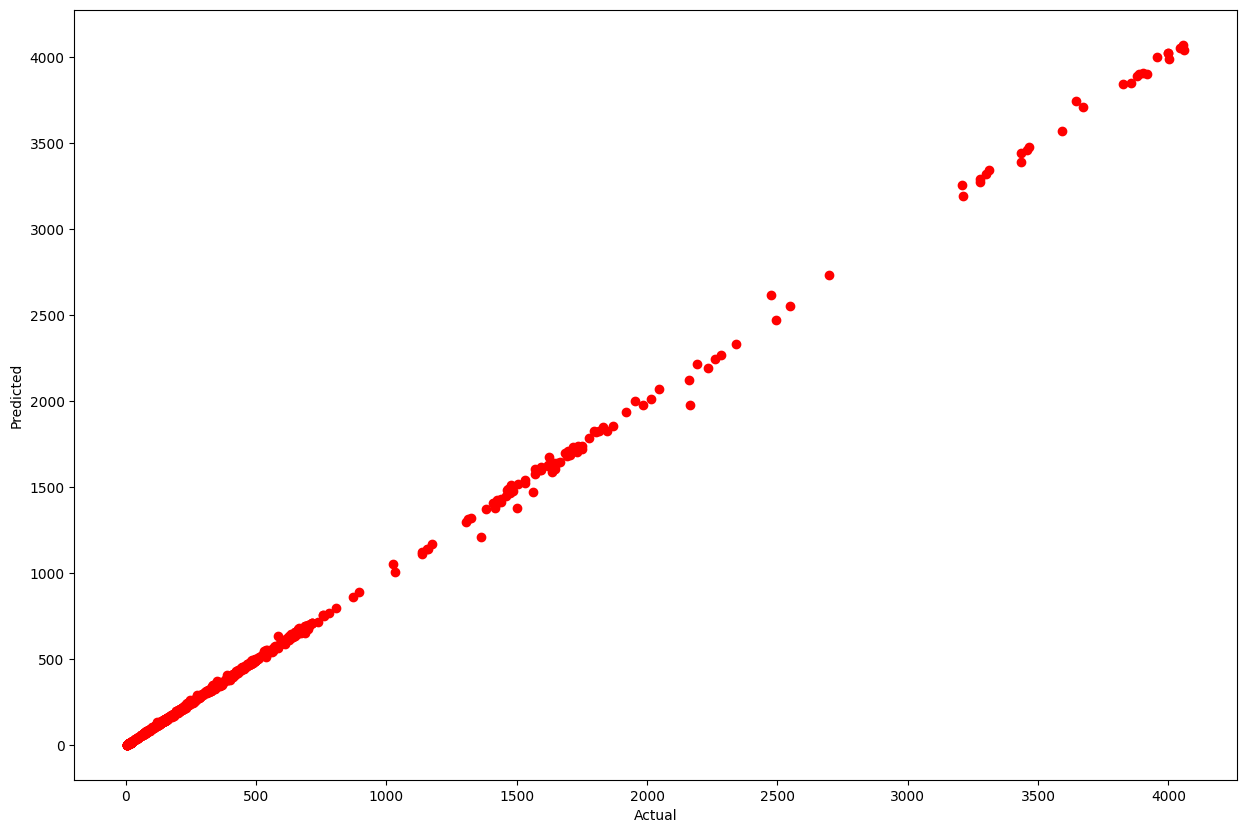

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [33]:
pred_y_df=pd.DataFrame(
    {
        "Actual_Value":y_test,
        "Predicted_Value":y_pred,
        "Difference":y_test-y_pred
    }
)

pred_y_df


,Actual_Value,Predicted_Value,Difference
2385,193.65,194.136570,-0.486570
2998,74.65,68.818429,5.831571
4415,1501.45,1375.327400,126.122600
2060,314.10,316.658983,-2.558983
3410,113.15,109.331569,3.818431
...,...,...,...
4055,211.20,204.045585,7.154415
4834,1796.60,1825.303728,-28.703728
2196,219.65,211.687635,7.962365
2839,583.40,565.593944,17.806056


In [34]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

NameError: ignored

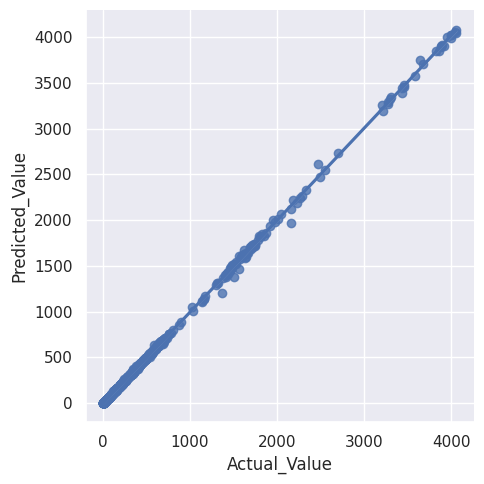

In [36]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12,10)})
scatter_poly2 = sns.lmplot(
    data = pred_y_df,
    x = "Actual_Value",
    y = "Predicted_Value",
    order = 2
)